# Programming II - Final Project
# **Who's a user?: Building a Machine Learning App in Python to Predict LinkedIn Users**

## Melissa Onate

### December 9th, 2025

### Import libraries that will be used for the project. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


---

#### Q1

In [4]:
s = pd.read_csv("social_media_usage.csv")
s.shape
s.head 

<bound method NDFrame.head of       respid  sample  comp   int_date  lang  state  density usr qs1  sex  ...  \
0        798       1     1  1/26/2021     1     51        5   S        2  ...   
1       1017       1     1  1/25/2021     1     39        2   S        1  ...   
2       1181       1     1  1/25/2021     1     32        2   U        2  ...   
3       1388       1     1  1/25/2021     1      4        3   U        1  ...   
4       1664       1     1  1/26/2021     1     12        2   S        2  ...   
...      ...     ...   ...        ...   ...    ...      ...  ..  ..  ...  ...   
1497  310017       2     1   2/3/2021     2     24        4   S   2    1  ...   
1498  310930       2     1   2/4/2021     2     35        1   R   2    1  ...   
1499  310960       2     1   2/4/2021     2     41        2   S   2    1  ...   
1500  311118       2     1   2/4/2021     2      6        3   U   2    2  ...   
1501  311426       2     1   2/4/2021     2      6        1   U   2    1  ...  

---

#### Q2

In [5]:
def clean_sm(x):
    return np.where(x == 1,
                    1, 
                    0)

In [6]:
# Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected
toy_df = pd.DataFrame({
    "col1": [9, 1, 5],
    "col2": [1, 9, 1]
})

# Testing the function to verify it is running correctly
toy_df["clean_col1"] = clean_sm(toy_df["col1"])
toy_df["clean_col2"] = clean_sm(toy_df["col2"])

toy_df



,col1,col2,clean_col1,clean_col2
0,9,1,0,1
1,1,9,1,0
2,5,1,0,1


---

#### Q3

In [29]:
# Create new dataframe ss
ss = s[["web1h", "income", "educ2", "par", "marital", "gender", "age"]].copy()

# Create sm_li using clean_sm
ss["sm_li"] = clean_sm(ss["web1h"])

# Rename features
ss = ss.rename(columns={
    "educ2": "education",
    "par": "parent",
    "marital": "married",
    "gender": "female"
})

# Feature transformation
ss["income"] = np.where(ss["income"].between(1, 9), ss["income"], np.nan)
ss["education"] = np.where(ss["education"].between(1, 8), ss["education"], np.nan)
ss["parent"] = np.where(ss["parent"] == 1, 1,
                        np.where(ss["parent"] == 2, 0, np.nan))
ss["married"] = np.where(ss["married"] == 1, 1, 0)
ss["female"] = np.where(ss["female"] == 2, 1, 0)
ss["age"] = np.where(ss["age"] <= 97, ss["age"], np.nan)

# Drop missing values
ss = ss.dropna()

# No longer needed
ss = ss.drop(columns=["web1h"])

ss.head()


,income,education,parent,married,female,age,sm_li
0,6.0,4.0,0.0,0,1,77.0,0
1,5.0,3.0,0.0,0,0,59.0,0
2,8.0,4.0,0.0,1,1,60.0,0
3,8.0,8.0,0.0,0,0,73.0,0
4,7.0,8.0,0.0,1,1,65.0,1


In [31]:
ss.shape
ss.isna().sum()
ss["sm_li"].value_counts(dropna=False)

sm_li
0    840
1    420
Name: count, dtype: int64

In [28]:
# Exploratory Analysis
ss.describe()

,web1h,income,education,parent,married,female,age,sm_li
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,1.685714,5.865873,5.203175,0.249206,0.483333,0.419841,51.253968,0.333333
std,0.590864,2.474385,1.877501,0.432725,0.499921,0.493729,18.403705,0.471592
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,36.000000,0.000000
50%,2.000000,6.000000,5.000000,0.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,8.000000,6.000000,0.000000,1.000000,1.000000,65.000000,1.000000
max,8.000000,9.000000,8.000000,1.000000,1.000000,1.000000,97.000000,1.000000


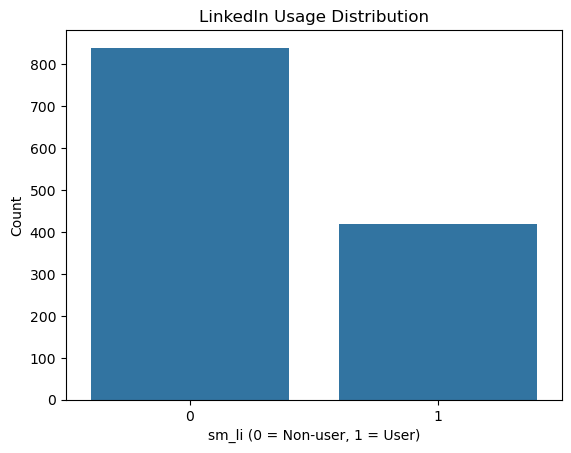

In [9]:
# LinkedIn usage Distribution
sns.countplot(x="sm_li", data=ss)
plt.title("LinkedIn Usage Distribution")
plt.xlabel("sm_li (0 = Non-user, 1 = User)")
plt.ylabel("Count")
plt.show()


In [10]:
ss.columns

Index(['web1h', 'income', 'education', 'parent', 'married', 'female', 'age',
       'sm_li'],
      dtype='object')

#### The chart shows that most people in this dataset don’t use LinkedIn, and only a smaller group does. This can be because only people in specific careers or industries use LinkedIn. 

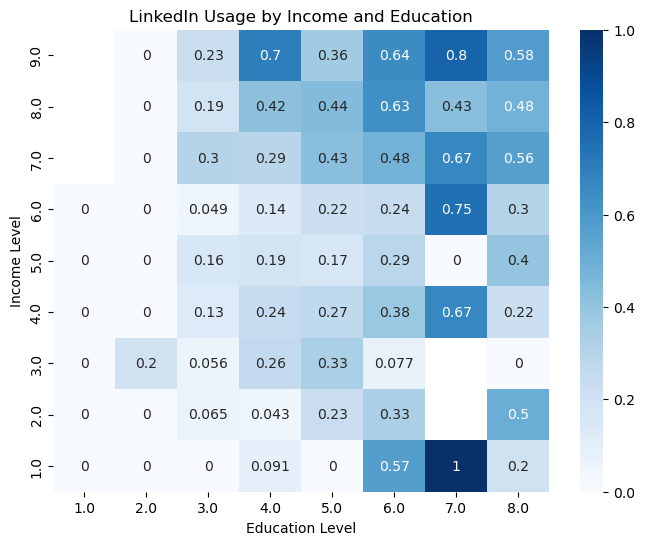

In [19]:
# LI usage by Income and Education 
pivot = ss.pivot_table(
    values="sm_li",
    index="income",
    columns="education",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="Blues")

plt.title("LinkedIn Usage by Income and Education")
plt.xlabel("Education Level")
plt.ylabel("Income Level")

plt.gca().invert_yaxis() #Inverts the income scale
plt.show()

#### The heatmap is showing us that people with a higher education level and a higher income are more likely to be LinkedIn users. 

In [ ]:
# Exploring Relationships between Variables. 
sns.pairplot(
    ss[["income", "education", "age", "sm_li"]],
    hue="sm_li",
    diag_kind="kde",
    palette="coolwarm"
)

plt.suptitle("Pair Plot of Key Variables by LinkedIn Usage", y=1.02)
plt.show()


#### The pair plot gives a visual comparison of income, age, and education across LinkedIn users and non-users. The graph shows that LinkedIn users tend to appear more in the higher income and higher education groups, while both groups look fairly similar by age.

---

#### Q4

In [12]:
# Target (y) and feature(s) selection (X)
y = ss["sm_li"]
x = ss[["income", "education", "parent", "married", "female", "age"]]

---

#### Q5

In [13]:
# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    stratify=y,       # same number of target in training & test set
                                                    test_size=0.2,    # hold out 20% of data for testing
                                                    random_state=50) # set for reproducibility


#### x_train contains 80% of the variables and they are what we use to train the model.
#### y_train contains the corresponding LinkedIn usage values, 0 or 1 for the training data.
#### x_test contains the remaining 20% of the variables that the model has not seen before.
#### y_test contains the true LinkedIn usage values for that test set.

#### We train the model using the training sets, and then use the test sets to check how well the model performs on new, unseen data. Holding out 20% helps us evaluate the model’s accuracy. 

---

#### Q6

In [14]:
# Initialize logistic regression model with balanced class weights
lr = LogisticRegression(max_iter=1000, class_weight="balanced")

# Fit model on the training data
lr.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

---

#### Q7 

In [15]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

# Model accuracy
accuracy = lr.score(x_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 67.86%


#### The model accuracy shows that the model was able to make the correct prediction for about 67.86% of the users in the test set, in determining whether they were LinkedIn users or non-users.

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[107,  61],
       [ 20,  64]])

#### The confusion matrix shows the following: 
#### 107 (True Negatives): These are people who do not use LinkedIn, and the model correctly predicted them as non-users. 
#### 61 (False Positives): These are non-users who the model incorrectly labeled as LinkedIn users. 
#### 20 (False Negatives): These are actual LinkedIn users who the model missed and predicted as non-users. 
#### 64 (True Positives): These are people who do use LinkedIn, and the model correctly identified them as users.
#### The confusion matrix is indicating that the model was better at identifying non Linkedin users.

---

#### Q8

In [17]:
confusion_matrix_df = pd.DataFrame(
    cm, 
    columns=["Predicted Non-user (0)", "Predicted User (1)"],
    index=["Actual Non-user (0)", "Actual User (1)"]
)

confusion_matrix_df

,Predicted Non-user (0),Predicted User (1)
Actual Non-user (0),107,61
Actual User (1),20,64


---

#### Q9

#### - recall: TP/(TP+FN)
####  64/(64+20)=0.762

#### - precision: TP/(TP+FP)
#### 64/(64+61)=0.512

#### - F1 score: (precision*recall)/(precision+recall)
#### (0.512*0.762)/(0.512+0.762)=0.612

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.51      0.76      0.61        84

    accuracy                           0.68       252
   macro avg       0.68      0.70      0.67       252
weighted avg       0.73      0.68      0.69       252



#### Precision, recall, and the F1 score help us understand how the model performs beyond accuracy. **Precision** indicates how often the model is correct when it predicts someone is a LinkedIn user. In this case, precision is lower, which means the model is more likely to label a non-user as a user. This matters for the marketing team because targeting people who don’t actually use LinkedIn is unnecessary. 

#### **Recall** measures how well the model captures actual LinkedIn users. Our recall is high, meaning the model does a better job at identifying real users. This can be helpful if the goal is to include as many potential LinkedIn users as possible for a marketing campaign. 

#### **F1 score** balances both metrics and gives us a single measure of how the model handles both types of mistakes. Since our precision and recall are not equally strong, the F1 score shows a realistic picture of general performance for deciding how dependable these predictions are.

---

#### Q10

In [20]:
# Making Predictions: User 1 age 42
user1 = pd.DataFrame({
    "income": [8],
    "education": [7],
    "parent": [0],
    "married": [1],
    "female": [1],
    "age": [42]
})

user1["linkedin_prob"] = lr.predict_proba(user1)[:, 1]
user1


,income,education,parent,married,female,age,linkedin_prob
0,8,7,0,1,1,42,0.717226


In [21]:
# User 2 age 82, same inputs
user2 = pd.DataFrame({
    "income": [8],
    "education": [7],
    "parent": [0],
    "married": [1],
    "female": [1],
    "age": [82]
})

user2["linkedin_prob"] = lr.predict_proba(user2)[:, 1]
user2


,income,education,parent,married,female,age,linkedin_prob
0,8,7,0,1,1,82,0.454457


#### The model predicts a higher probability of LinkedIn usage for the 42 year old in comparison to the 82 year old, even though all the other characteristics are the same. This shows that age plays an important factor in the model’s predictions and reflects broader patterns when it comes to social media use. 

In [23]:
# Additional Predictions
user3 = pd.DataFrame({
    "income": [7],
    "education": [6],
    "parent": [0],
    "married": [0],
    "female": [1],
    "age": [27]
})

user3["linkedin_prob"] = lr.predict_proba(user3)[:, 1]
user3

                        

,income,education,parent,married,female,age,linkedin_prob
0,7,6,0,0,1,27,0.72156


In [22]:
user4 = pd.DataFrame({
    "income": [7],
    "education": [6],
    "parent": [0],
    "married": [0],
    "female": [1],
    "age": [39]
})

user4["linkedin_prob"] = lr.predict_proba(user4)[:, 1]
user4

,income,education,parent,married,female,age,linkedin_prob
0,7,6,0,0,1,39,0.649806


#### I added two extra examples using ages within my age range to see how the model behaves in a more realistic scenario. These predictions also showed higher LinkedIn probabilities, which matches the trend the model shows where younger ages are more likely to use LinkedIn.

---

In [24]:
import pickle

final_model = lr 

with open("linkedin_model.pkl", "wb") as f:
    pickle.dump(final_model, f)